In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd


print(tf.__version__)

0.12.1


In [2]:
path_data = './data/fire_theft.xls'

book = xlrd.open_workbook(path_data, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

#print(n_samples)
#print(data.T[1])


Epoch 0: 3.3239139020442963
Epoch 10: 2.720461067699251
Epoch 20: 2.165511638280891
Epoch 30: 1.9190489380132585
Epoch 40: 1.823004533847173
Epoch 50: 1.7541611450946046
Epoch 60: 1.7177828319725537
Epoch 70: 1.700041592432951
Epoch 80: 1.689413756708659
Epoch 90: 1.6837719044089317
Epoch 100: 1.683084371313455
Epoch 110: 1.6823872672287485
Epoch 120: 1.681690403050966
Epoch 130: 1.6809937174529554
Epoch 140: 1.6802971553749255
Epoch 150: 1.679600741137706
Epoch 160: 1.678904505285118
Epoch 170: 1.678208482469472
Epoch 180: 1.6775124702301019
Epoch 190: 1.6768166353872835
Result
1.97668 0.445538


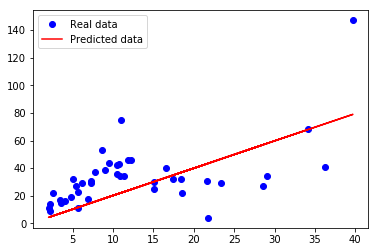

In [22]:

# Y_= w*X + b

X = tf.placeholder( dtype=tf.float32, name='X'  )
Y = tf.placeholder( dtype=tf.float32, name='Y'  )

w = tf.Variable( 0.0, name='w' )
b = tf.Variable( 0.0, name='b' )

Yhat = X*w + b


#E = tf.square( Y - Yhat, name='loss' )

# Pseudo-Huber loss function
# https://en.wikipedia.org/wiki/Huber_loss
# L(a) = delta^2 ( (1+ (a/delta)^2 )^0.5 - 1 )
delta = 0.1
E = (delta*delta) * ( tf.sqrt(1.0 + tf.square(((Y-Yhat)/delta)) ) - 1.0 )

    
opt = tf.train.GradientDescentOptimizer( learning_rate=0.001 ).minimize( E )

init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run( init )
    
    for i in range(200):
        loss = 0
        for x, y in data:        
            feed_dict = {X:x, Y:y }
            _,l = sess.run( [opt, E], feed_dict=feed_dict  )
            loss += l         
            
        if i%10 == 0:
            print('Epoch {0}: {1}'.format(i, loss/n_samples) )

    w, b = sess.run( [w,b] )

    
print('Result')
print(w,b)
    
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()



Epoch 0: 3.2540038838273
Epoch 10: 3.233273138602575
Epoch 20: 3.009924883643786
Epoch 30: 2.9581027093032994
Epoch 40: 2.9168119944986843
Epoch 50: 2.803063642411005
Epoch 60: 2.819355245857012
Epoch 70: 2.770615199492091
Epoch 80: 2.641749033260913
Epoch 90: 2.8632186388685588
Epoch 100: 2.6355551974404428
Epoch 110: 2.5910845087131573
Epoch 120: 2.261923329815978
Epoch 130: 2.503868570285184
Epoch 140: 1.6980391666293144
Epoch 150: 2.5738574039368403
Epoch 160: 2.38131709503276
Epoch 170: 1.6424745378040133
Epoch 180: 1.555746049043678
Epoch 190: 2.2196852030409944
0.04165 2.75914 0.511642


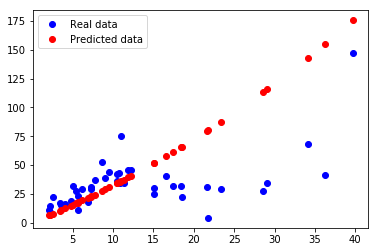

In [25]:
# Y_= w*X^2 + u*X + b

X = tf.placeholder( dtype=tf.float32, name='X'  )
Y = tf.placeholder( dtype=tf.float32, name='Y'  )

w = tf.Variable(0.0, 'w')
u = tf.Variable(0.0, 'u')
b = tf.Variable(0.0, 'b')

# function
#Yhat =  tf.multiply(X,w) + b
Yhat =  X*X*u + X*w + b


#E = tf.reduce_mean( tf.square( Yhat - Y ) )
#E = tf.nn.l2_loss(Yhat-Y)
#E = tf.square( Y - Yhat )

# Pseudo-Huber loss function
# https://en.wikipedia.org/wiki/Huber_loss
# L(a) = delta^2 ( (1+ (a/delta)^2 )^0.5 - 1 )
delta = 0.1
E = (delta*delta) * ( tf.sqrt(1.0 + tf.square(((Y-Yhat)/delta)) ) - 1.0 )

optimizer = tf.train.GradientDescentOptimizer( learning_rate=0.001 )
opt_min = optimizer.minimize(E)

init = tf.global_variables_initializer()

with tf.Session() as sess: 
    
    sess.run( init )
    
    for i in range(200):
        loss = 0
        for x, y in data:        
            feed_dict = {X:x, Y:y }
            _,l = sess.run( [opt_min, E], feed_dict=feed_dict  )
            loss += l        
            
        if i%10 == 0:
            print('Epoch {0}: {1}'.format(i, loss/n_samples) )      
        
    u,w,b = sess.run([u,w,b])

print(u,w,b)

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X*X*u + X*w + b, 'ro', label='Predicted data')
plt.legend()
plt.show()


In [8]:

def tflineal( X_input, Y_input, delta = 0.1, learning_rate=0.001, epoch=100 ):
    
    
    n = len(Y_input)
    
    # Y_= w*X + b
    X = tf.placeholder( dtype=tf.float32, name='X'  )
    Y = tf.placeholder( dtype=tf.float32, name='Y'  )
    w = tf.Variable( 0.0, name='w' )
    b = tf.Variable( 0.0, name='b' )
    
    #function
    Yhat = X*w + b 
    
    #loss    
    #E = tf.mul( (delta*delta) , ( tf.sqrt(1.0 + tf.square(((Y-Yhat)/delta)) ) - 1.0 ), name='loss')
    E = tf.reduce_mean( tf.square( Yhat - Y ), name='loss' )
    
    #optimizer
    opt = tf.train.GradientDescentOptimizer( learning_rate=0.1 ).minimize( E )
    
    #initialize
    init = tf.global_variables_initializer()

    with tf.Session() as sess:

        writer = tf.summary.FileWriter( './graphs/', sess.graph )
        sess.run( init )

        for i in range(epoch):
            
            feed_dict = {X:X_input, Y:Y_input }
            _,loss = sess.run([opt,E], feed_dict=feed_dict  )
            
            #loss = 0
            #for k in range(n):        
            #    feed_dict = {X:X_input[k], Y:Y_input[k] }
            #    _,l = sess.run( [opt, E], feed_dict=feed_dict  )
            #    loss += l         

            if i%100 == 0:
                print('Epoch {0}: {1}'.format(i, loss) )

        w, b = sess.run( [w,b] ) 
    
    writer.close()
    return w,b



![](graph.png)

Epoch 0: 3.2466297149658203
Epoch 100: 0.26857367157936096
Result
2.95923 -0.00771226


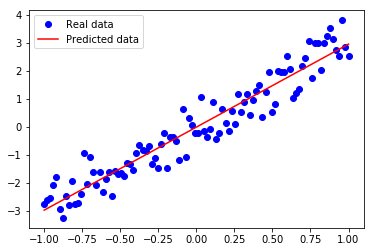

In [13]:
X_input = np.linspace(-1,1,100)
Y_input = X_input*3 + np.random.randn( X_input.shape[0] )*0.5

w,b = tflineal(X_input, Y_input, learning_rate=0.00001, epoch=200);
    
print('Result')
print(w,b)
    
# plot the results
X, Y = X_input, Y_input
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()


In [18]:
#Notas
#learning rate

global_step   = tf.Variable( 0, dtype=tf.int32, trainable=False )
learning_rate = 0.01*0.99**tf.cast( global_step, dtype=tf.float32 )
increment_step = global_step.assign_add(1)

with tf.Session() as sess:
    sess.run( tf.global_variables_initializer() )
    print( sess.run(global_step) )
    print( sess.run(learning_rate) )
    sess.run(increment_step)
    print( sess.run(global_step) )
    print( sess.run(learning_rate) )


0
0.01
1
0.0099


In [ ]:
# Object oriented programing

class linalModel:
    """ Build lineal model """
    
    def __init__(self, params):
        pass
    
    def __

